<a href="https://colab.research.google.com/github/RafaelRomeroTechDev/Challenge_Alura_Store/blob/main/Challenge_Alura_Store_Rafael_Romero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**¡Bienvenidos al primer desafío!**
Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

##**Lo que practicarás:**
1. Cargue y manipule datos CSV con la biblioteca Pandas.
2. Cree visualizaciones de datos con la biblioteca Matplotlib.
3. Analice métricas como ingresos, reseñas y rendimiento de ventas.

##**Requisitos:**

###**Analizar datos de la tienda:**

1. Debes evaluar información como los ingresos, las categorías más vendidas,las reseñas de los clientes, los productos más vendidos y el envío promedio.



###**Crear gráficos para visualización:**

1. Decide qué tipos de gráficos utilizar para presentar los resultados de forma clara y visual.

2. Mínimo de 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.



### Importacion de datos

In [32]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación

- Creo dos listas, una que contiene las cuatro tiendas y otra que contiene la suma de los ingresos de cada tienda en la columna "Precio"
- Creo un bucle for creando una para cada tienda en la cual se almacena los valores de los ingresos resultados de las ventas y una variable con la suma de ingresos de cada tienda
-Imprimo los valores de la suma de los ingresos de cada tienda a partir de la lista creada en el paso 1

In [33]:
tiendas = [tienda1, tienda2, tienda3, tienda4]  # Lista de las tiendas
sumas_precios = [] #Lista para almacenar las sumas de cada tienda

for tienda in tiendas:
    tienda_precios = tienda['Precio'].tolist() # Convertir a lista directamente
    suma_tienda_precios = sum(tienda_precios)
    sumas_precios.append(suma_tienda_precios) # Agregamos la suma a la lista

print(f'Ingreso total: Tienda ${sumas_precios[0]:,}, Tienda2 ${sumas_precios[1]:,}, Tienda3 ${sumas_precios[2]:,}, Tienda4 ${sumas_precios[3]:,}')

Ingreso total: Tienda $1,150,880,400.0, Tienda2 $1,116,343,500.0, Tienda3 $1,098,019,600.0, Tienda4 $1,038,375,700.0


Se crea la grafica de del total de ingresos por tiendas

- Se utiliza la funcion np.mean de NumPy para calcular el promedio de la lista de suma de ingresos de la tienda

In [34]:
import matplotlib.pyplot as plt
import numpy as np

ingreso_medio = np.mean(sumas_precios)

- Para colocar los nombres de las tiendas en el grafico creo una lista con los nombres de las tiendas
- En el primer grafico los valores de los ingresos salian sin formato, cree la funcion formatoMillones para que que quite los ceros de millones y agregue la letra "M" de millones

In [35]:
nombre_tiendas = [f'Tienda_{i+1}' for i in range(len(tiendas))]

def formatoMillones(x, pos):
    """
    Formatea un número para mostrarlo en millones.
    Args:
        x (float): El número a formatear.
        pos (int): Posición (no se utiliza en este caso, requerido por FuncFormatter).
    Returns:
        str: El número formateado como una cadena (ej., '10M' para 10,000,000).
    """
    return f'{x / 1e6:.0f}M'


- Ahora generamos el grafico, el formato se le dio luego de varias pruebas para que quedara de este modo con la funcion plt

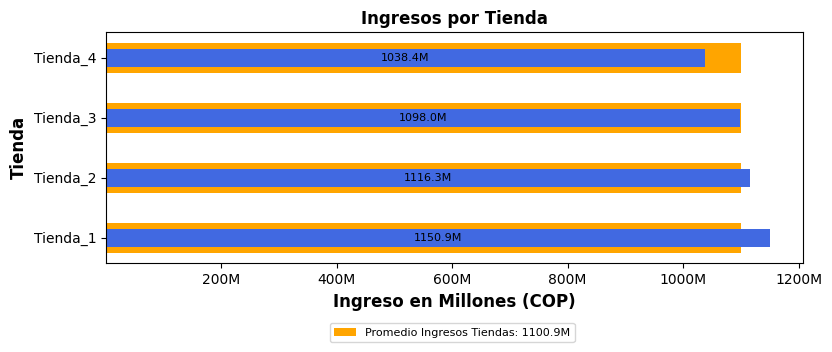

In [36]:
# Crea una nueva figura y un conjunto de subgráficos.
plt.figure(figsize=(9, 3))

# Dibuja barras horizontales para el ingreso promedio de las tiendas.
# - nombre_tiendas: Etiquetas de las tiendas en el eje y.
# - [ingreso_medio] * len(nombre_tiendas): Lista con el ingreso promedio repetido para cada tienda.
# - height: Altura de las barras.
# - color: Color de las barras.
# - alpha: Transparencia de las barras.
# - left: Posición inicial en el eje x.
# - label: Etiqueta para la leyenda.
plt.barh(nombre_tiendas, [ingreso_medio] * len(nombre_tiendas), height=0.5, color='orange', alpha=1, left=0.5, label=f'Promedio Ingresos Tiendas: {ingreso_medio / 1e6:.1f}M')

# Dibuja barras horizontales para la suma de los precios por tienda.
# - barras: Guarda el objeto de las barras para agregar etiquetas de texto después.
barras = plt.barh(nombre_tiendas, sumas_precios, height=0.3,color='royalblue')

# Establece el título del gráfico.
plt.title('Ingresos por Tienda', fontsize=12, fontweight='bold')
# Establece la etiqueta del eje y.
plt.ylabel('Tienda', fontsize=12, fontweight='bold')
# Establece la etiqueta del eje x.
plt.xlabel('Ingreso en Millones (COP)', fontsize=12, fontweight='bold')
# Formatea el eje x para mostrar los valores en millones.
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatoMillones))

# Agrega etiquetas de texto a las barras.
for bar in barras:
  width = bar.get_width() # Obtiene el ancho de la barra.
   # Agrega el texto en el centro de la barra.
  plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width/1e6:.1f}M', va='center', ha='center', fontsize=8)

# Agrega una leyenda al gráfico.
# - fontsize: Tamaño de la fuente de la leyenda.
# - loc: Ubicación de la leyenda.
# - bbox_to_anchor: Ajuste fino de la posición de la leyenda.
plt.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.68, -0.3))
# Muestra el gráfico.
plt.show()


#2. Ventas por Categoria

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

- Inicio definiendo una función para separar los datos de Categoría del Producto, la cantidad de productos y el ingreso total por Categoría y crear un diccionario para cada Tienda con la Categoría del Producto como llave y la cantidad y el ingreso total como valor de la llave
- Se imprime la información de forma organizada por tienda

In [37]:
def calcular_datos_producto(tienda):
    """
    Calcula el total de elementos y el precio total por categoría de producto para una tienda.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        dict: Un diccionario donde las claves son las categorías de productos y los valores
              son tuplas con el total de elementos y el precio total.
    """
    # Agrupa los datos por 'Categoria del Producto' y calcula el tamaño de cada grupo y la suma del precio.
    grupo_categoria = tienda.groupby('Categoría del Producto').agg(
        total_elementos=('Categoría del Producto', 'size'),
        precio_total=('Precio', 'sum')
    )

    # Convierte el resultado a un diccionario de Python para facilitar el acceso.
    diccionario_resultado = grupo_categoria.to_dict(orient='index')

    # Convierte los valores del diccionario a tuplas
    for key, value in diccionario_resultado.items():
        diccionario_resultado[key] = (value['total_elementos'], value['precio_total'])

    return diccionario_resultado

# Calcula los datos para cada tienda
tienda1_datos = calcular_datos_producto(tienda1)
tienda2_datos = calcular_datos_producto(tienda2)
tienda3_datos = calcular_datos_producto(tienda3)
tienda4_datos = calcular_datos_producto(tienda4)

# Imprime los resultados de forma legible
print("Datos de la Tienda 1:")
for categoria, (total_elementos, precio_total) in tienda1_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 2:")
for categoria, (total_elementos, precio_total) in tienda2_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 3:")
for categoria, (total_elementos, precio_total) in tienda3_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 4:")
for categoria, (total_elementos, precio_total) in tienda4_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")


Datos de la Tienda 1:
  Categoría: Artículos para el hogar, Total de Elementos: 171, Precio Total: $12,698,400
  Categoría: Deportes y diversión, Total de Elementos: 284, Precio Total: $39,290,000
  Categoría: Electrodomésticos, Total de Elementos: 312, Precio Total: $363,685,200
  Categoría: Electrónicos, Total de Elementos: 448, Precio Total: $429,493,500
  Categoría: Instrumentos musicales, Total de Elementos: 182, Precio Total: $91,299,000
  Categoría: Juguetes, Total de Elementos: 324, Precio Total: $17,995,700
  Categoría: Libros, Total de Elementos: 173, Precio Total: $8,784,900
  Categoría: Muebles, Total de Elementos: 465, Precio Total: $187,633,700

Datos de la Tienda 2:
  Categoría: Artículos para el hogar, Total de Elementos: 181, Precio Total: $14,746,900
  Categoría: Deportes y diversión, Total de Elementos: 275, Precio Total: $34,744,500
  Categoría: Electrodomésticos, Total de Elementos: 305, Precio Total: $348,567,800
  Categoría: Electrónicos, Total de Elementos: 422,

- Ahora imprimo el grafico de barras horizontales de la Categoría del Producto y la Cantidad por categoría para las cuatro tiendas con el formato y estilo del grafico anterior.

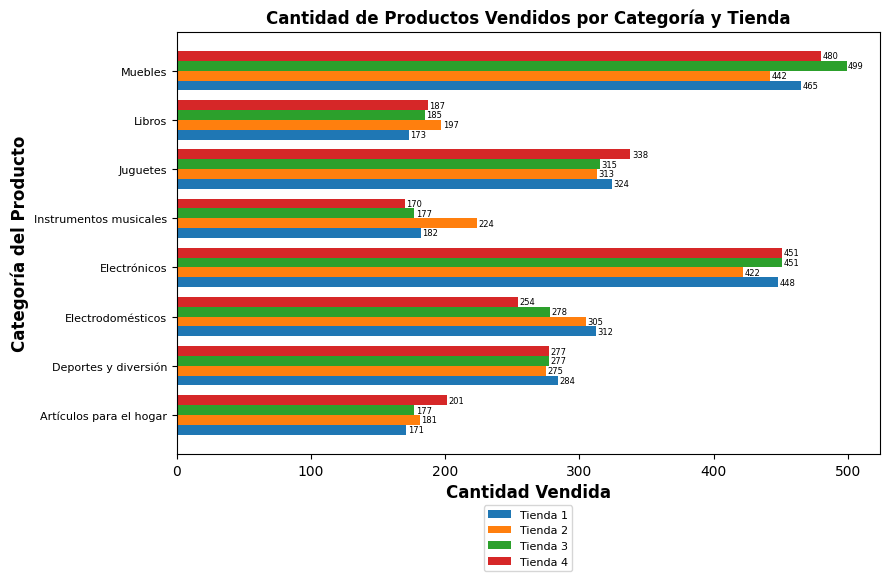

In [38]:
# Función para crear el gráfico de barras agrupado a partir de los diccionarios
def crear_grafico_desde_diccionarios(datos_tiendas, nombres_tiendas):
    """
    Crea un gráfico de barras agrupado para visualizar las ventas por categoría en diferentes tiendas.

    Args:
        datos_tiendas (list): Una lista de diccionarios, donde cada diccionario representa los datos de una tienda.
        nombres_tiendas (list): Una lista de nombres para las tiendas.
    """
    # 1. Preparar los datos para el gráfico:
    #    - Convertir los diccionarios a un formato adecuado para el gráfico (DataFrame).
    data_grafico = []
    for i, datos_tienda in enumerate(datos_tiendas):
        # Crea una lista de diccionarios para cada tienda
        lista_categorias = [{'Categoria': categoria, 'Cantidad': cantidad, 'Tienda': nombres_tiendas[i]}
                            for categoria, (cantidad, _) in datos_tienda.items()]
        data_grafico.extend(lista_categorias)  # Extiende la lista, no append para aplanar la lista de listas

    data_grafico_consolidado = pd.DataFrame(data_grafico)  # Convierte la lista de diccionarios a DataFrame

    # 2. Crear el gráfico de barras agrupado usando matplotlib:
    fig, ax = plt.subplots(figsize=(9, 6))  # Ajusta el tamaño de la figura según sea necesario
    n_tiendas = len(nombres_tiendas)
    ancho_barra = 0.8 / n_tiendas  # Ancho de cada barra dentro de un grupo
    posiciones_grupos = range(len(data_grafico_consolidado['Categoria'].unique()))

    for i, nombre_tienda in enumerate(nombres_tiendas):
        # Filtra los datos para la tienda actual
        data_tienda = data_grafico_consolidado[data_grafico_consolidado['Tienda'] == nombre_tienda]
        # Calcula las posiciones de las barras para la tienda actual
        posiciones_barras = [pos + i * ancho_barra for pos in posiciones_grupos]
        # Dibuja las barras para la tienda actual
        barras = ax.barh(posiciones_barras, data_tienda['Cantidad'], height=ancho_barra, label=nombre_tienda) #cambio a barh

        # Añadir etiquetas de cantidad a la derecha de cada barra
        for barra in barras:
            cantidad = barra.get_width()
            ax.text(cantidad + 1, barra.get_y() + barra.get_height() / 2,
                    f'{cantidad}', va='center', ha='left', fontsize=6)

    # Añade etiquetas y título
    ax.set_ylabel('Categoría del Producto', fontsize=12, fontweight='bold') #cambio xlabel por ylabel
    ax.set_xlabel('Cantidad Vendida', fontsize=12, fontweight='bold') #cambio ylabel por xlabel
    ax.set_title('Cantidad de Productos Vendidos por Categoría y Tienda', fontsize=12, fontweight='bold')
    ax.set_yticks([pos + (n_tiendas - 1) * ancho_barra / 2 for pos in posiciones_grupos])  # Centra las etiquetas de las categorías
    ax.set_yticklabels(data_grafico_consolidado['Categoria'].unique(),  ha="right", fontsize=8)  # Rotar etiquetas para mejor legibilidad #cambio xticklabels por yticklabels
    ax.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.57, -0.2))  # Muestra la leyenda para identificar las tiendas

    plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
    plt.show()  # Muestra el gráfico

# Llama a la función para crear el gráfico usando los diccionarios
crear_grafico_desde_diccionarios([tienda1_datos, tienda2_datos, tienda3_datos, tienda4_datos], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])


- Ahora imprimo el grafico de barras horizontales de la Categoría del Producto y el ingreso total por categoría para las cuatro tiendas con el formato y estilo del grafico anterior.

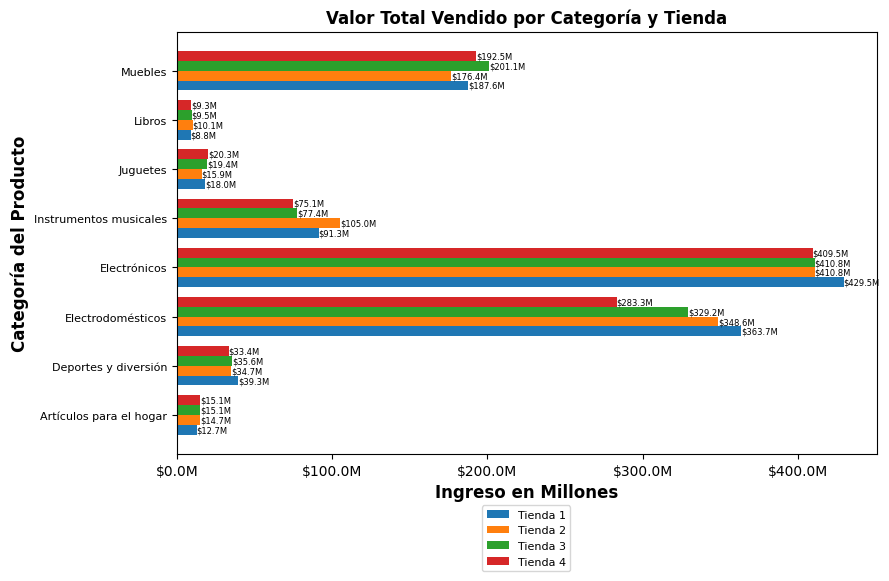

In [39]:
# Función para crear el gráfico de barras agrupado a partir de los diccionarios
def crear_grafico_valor_por_categoria(datos_tiendas, nombres_tiendas):
    """
    Crea un gráfico de barras agrupado para visualizar el valor total vendido por categoría en diferentes tiendas.

    Args:
        datos_tiendas (list): Una lista de diccionarios, donde cada diccionario representa los datos de una tienda.
        nombres_tiendas (list): Una lista de nombres para las tiendas.
    """
    # 1. Preparar los datos para el gráfico:
    #    - Convertir los diccionarios a un formato adecuado para el gráfico (DataFrame).
    data_grafico = []
    for i, datos_tienda in enumerate(datos_tiendas):
        # Crea una lista de diccionarios para cada tienda, extrayendo el precio total
        lista_categorias = [{'Categoria': categoria, 'Valor_Vendido': valor, 'Tienda': nombres_tiendas[i]}
                            for categoria, (_, valor) in datos_tienda.items()]  # Cambiado para obtener el precio_total
        data_grafico.extend(lista_categorias)
    data_grafico_consolidado = pd.DataFrame(data_grafico)

    # 2. Crear el gráfico de barras agrupado usando matplotlib:
    fig, ax = plt.subplots(figsize=(9, 6))
    n_tiendas = len(nombres_tiendas)
    ancho_barra = 0.8 / n_tiendas
    posiciones_grupos = range(len(data_grafico_consolidado['Categoria'].unique()))

    def formatoMillones(x, pos):
        return f'${x / 1e6:.1f}M'

    for i, nombre_tienda in enumerate(nombres_tiendas):
        data_tienda = data_grafico_consolidado[data_grafico_consolidado['Tienda'] == nombre_tienda]
        posiciones_barras = [pos + i * ancho_barra for pos in posiciones_grupos]
        barras = ax.barh(posiciones_barras, data_tienda['Valor_Vendido'], height=ancho_barra, label=nombre_tienda) #cambio a barh

        # Añadir etiquetas de valor a la derecha de cada barra
        for barra in barras:
            valor = barra.get_width()
            ax.text(valor + 1, barra.get_y() + barra.get_height() / 2,
                    f'${valor/1e6:.1f}M', va='center', ha='left', fontsize=6)

    ax.set_ylabel('Categoría del Producto', fontsize=12, fontweight='bold') #cambio xlabel por ylabel
    ax.set_xlabel('Ingreso en Millones', fontsize=12, fontweight='bold') #cambio ylabel por xlabel y el nombre
    ax.set_title('Valor Total Vendido por Categoría y Tienda', fontsize=12, fontweight='bold') #cambio el titulo
    ax.set_yticks([pos + (n_tiendas - 1) * ancho_barra / 2 for pos in posiciones_grupos])
    ax.set_yticklabels(data_grafico_consolidado['Categoria'].unique(),  ha="right", fontsize=8)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(formatoMillones))
    ax.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.57, -0.2))

    plt.tight_layout()
    plt.show()

# Llama a la función para crear el gráfico usando los diccionarios
crear_grafico_valor_por_categoria([tienda1_datos, tienda2_datos, tienda3_datos, tienda4_datos], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])


#3. Valoracion media por tienda
En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [40]:
def calcular_calificacion_producto(tienda):
    """
    Calcula el total de elementos, la suma de calificaciones y la calificación media por categoría de producto para una tienda.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        dict: Un diccionario donde las claves son las categorías de productos y los valores
              son tuplas con el total de elementos, la suma de calificaciones y la calificación media.
              Ejemplo: {'Categoría A': (120, 450.5, 3.75), 'Categoría B': (85, 320.0, 3.76)}
    """
    # Agrupa los datos por 'Categoría del Producto' y calcula el tamaño de cada grupo, la suma de las calificaciones y la media de las calificaciones.
    grupo_categoria = tienda.groupby('Categoría del Producto').agg(
        total_elementos=('Categoría del Producto', 'size'),
        suma_calificaciones=('Calificación', 'sum'),
        calificacion_media=('Calificación', 'mean')  # Agregamos el cálculo de la calificación media
    )

    # Convierte el resultado a un diccionario de Python para facilitar el acceso.
    diccionario_resultado = grupo_categoria.to_dict(orient='index')

    # Convierte los valores del diccionario a tuplas (total_elementos, suma_calificaciones, calificacion_media)
    for key, value in diccionario_resultado.items():
        diccionario_resultado[key] = (value['total_elementos'], value['suma_calificaciones'], value['calificacion_media'])

    return diccionario_resultado



# Calcula y muestra el resultado para cada tienda
resultados = {
    "Tienda 1": calcular_calificacion_producto(tienda1),
    "Tienda 2": calcular_calificacion_producto(tienda2),
    "Tienda 3": calcular_calificacion_producto(tienda3),
    "Tienda 4": calcular_calificacion_producto(tienda4)
}

# Imprime los resultados
for nombre_tienda, resultado in resultados.items():
    print(f"\n{nombre_tienda}:")
    for categoria, (total_elementos, suma_calificaciones, calificacion_media) in resultado.items():
        print(f"  {categoria}: Total de elementos = {total_elementos}, Suma de calificaciones = {suma_calificaciones:.2f}, Calificación media = {calificacion_media:.2f}")



Tienda 1:
  Artículos para el hogar: Total de elementos = 171, Suma de calificaciones = 641.00, Calificación media = 3.75
  Deportes y diversión: Total de elementos = 284, Suma de calificaciones = 1107.00, Calificación media = 3.90
  Electrodomésticos: Total de elementos = 312, Suma de calificaciones = 1258.00, Calificación media = 4.03
  Electrónicos: Total de elementos = 448, Suma de calificaciones = 1794.00, Calificación media = 4.00
  Instrumentos musicales: Total de elementos = 182, Suma de calificaciones = 737.00, Calificación media = 4.05
  Juguetes: Total de elementos = 324, Suma de calificaciones = 1321.00, Calificación media = 4.08
  Libros: Total de elementos = 173, Suma de calificaciones = 688.00, Calificación media = 3.98
  Muebles: Total de elementos = 465, Suma de calificaciones = 1835.00, Calificación media = 3.95

Tienda 2:
  Artículos para el hogar: Total de elementos = 181, Suma de calificaciones = 737.00, Calificación media = 4.07
  Deportes y diversión: Total de e


* Generamos el grafico de la calificación promedio por categoria y por tienda



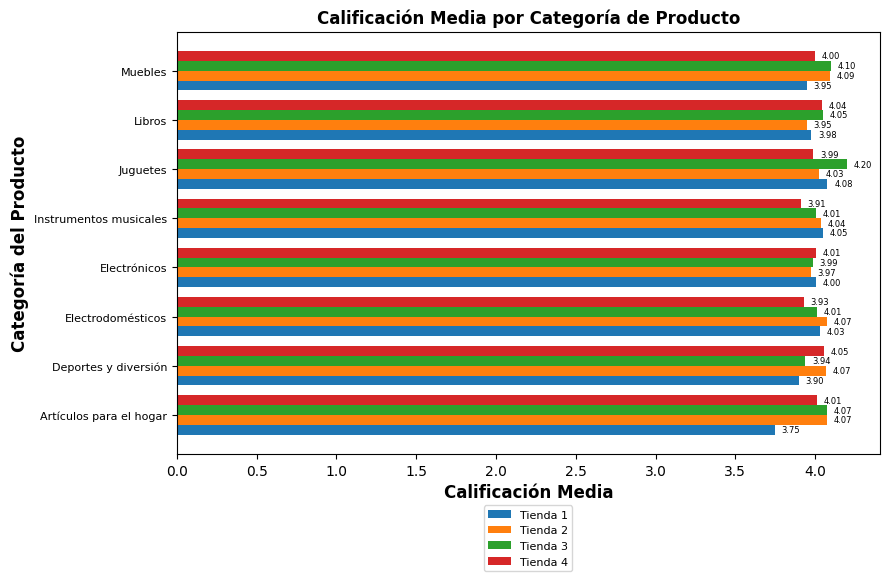

In [41]:
# Función para crear el gráfico de barras agrupado a partir de los diccionarios
def crear_grafico_valor_por_categoria(datos_tiendas, nombres_tiendas, titulo, ylabel, xlabel, nombre_columna_valor):
    """
    Crea un gráfico de barras agrupado para visualizar el valor total vendido por categoría en diferentes tiendas.

    Args:
        datos_tiendas (list): Una lista de diccionarios, donde cada diccionario representa los datos de una tienda.
        nombres_tiendas (list): Una lista de nombres para las tiendas.
    """
    # 1. Preparar los datos para el gráfico:
    #     - Convertir los diccionarios a un formato adecuado para el gráfico (DataFrame).
    data_grafico = []
    for i, datos_tienda in enumerate(datos_tiendas):
        # Crea una lista de diccionarios para cada tienda, extrayendo el precio total
        lista_categorias = [{'Categoria': categoria, nombre_columna_valor: valor[2], 'Tienda': nombres_tiendas[i]}  # Cambiado para obtener la calificacion_media
                            for categoria, valor in datos_tienda.items()]  # Iterar sobre los datos de la tienda
        data_grafico.extend(lista_categorias)
    data_grafico_consolidado = pd.DataFrame(data_grafico)

    # 2. Crear el gráfico de barras agrupado usando matplotlib:
    fig, ax = plt.subplots(figsize=(9, 6))
    n_tiendas = len(nombres_tiendas)
    ancho_barra = 0.8 / n_tiendas
    posiciones_grupos = range(len(data_grafico_consolidado['Categoria'].unique()))

    def formatoMillones(x, pos):
        return f'{x / 1e6:.1f}M'  # Esto realmente no aplica para calificaciones, pero se deja por consistencia

    for i, nombre_tienda in enumerate(nombres_tiendas):
        data_tienda = data_grafico_consolidado[data_grafico_consolidado['Tienda'] == nombre_tienda]
        posiciones_barras = [pos + i * ancho_barra for pos in posiciones_grupos]
        barras = ax.barh(posiciones_barras, data_tienda[nombre_columna_valor], height=ancho_barra, label=nombre_tienda) #cambio a barh

        # Añadir etiquetas de valor a la derecha de cada barra
        for barra in barras:
            valor = barra.get_width()
            ax.text(valor + 0.1, barra.get_y() + barra.get_height() / 2,  # Ajustado para que las etiquetas no se superpongan
                    f'{valor:.2f}', va='center', ha='center', fontsize=6)

    ax.set_ylabel('Categoría del Producto', fontsize=12, fontweight='bold') #cambio xlabel por ylabel
    ax.set_xlabel(xlabel, fontsize=12, fontweight='bold') #cambio ylabel por xlabel y el nombre
    ax.set_title(titulo, fontsize=12, fontweight='bold') #cambio el titulo
    ax.set_yticks([pos + (n_tiendas - 1) * ancho_barra / 2 for pos in posiciones_grupos])
    ax.set_yticklabels(data_grafico_consolidado['Categoria'].unique(), ha="right", fontsize=8)
    #ax.xaxis.set_major_formatter(plt.FuncFormatter(formatoMillones)) # Elimino el formato de millones
    ax.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.57, -0.2))

    plt.tight_layout()
    plt.show()

# Llama a la función para crear el gráfico usando los diccionarios
crear_grafico_valor_por_categoria(
    [resultados["Tienda 1"], resultados["Tienda 2"], resultados["Tienda 3"], resultados["Tienda 4"]],
    ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Media por Categoría de Producto',
    'Categoría del Producto',
    'Calificación Media',
    'Calificacion_media'
)


Tambien generamos el grafico  de la calificación promedio general

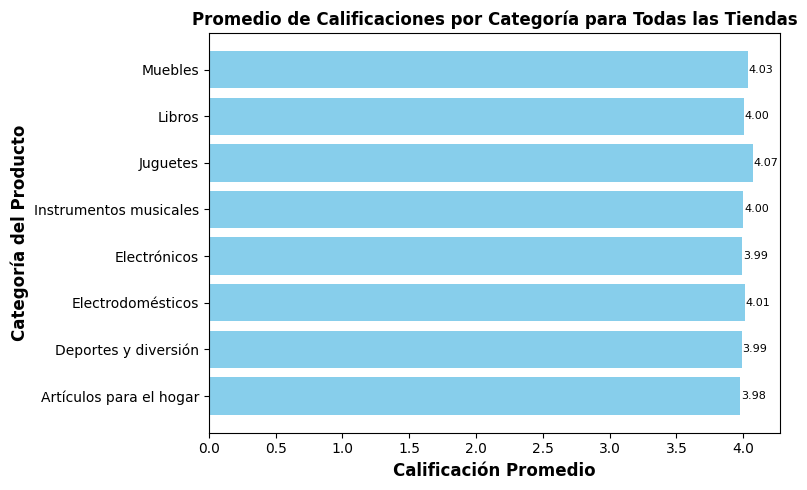

In [42]:
def crear_grafico_promedio_calificaciones(datos_tiendas, nombres_tiendas):
    """
    Crea un gráfico de barras para visualizar el promedio de calificaciones por categoría para las cuatro tiendas.

    Args:
        datos_tiendas (list): Una lista de diccionarios, donde cada diccionario representa los datos de una tienda.
        nombres_tiendas (list): Una lista de nombres para las tiendas.
    """
    # 1. Unificar datos de todas las tiendas en un solo diccionario
    todas_las_categorias = {}
    for tienda, nombre_tienda in zip(datos_tiendas, nombres_tiendas):
        for categoria, (_, _, calificacion_media) in tienda.items(): # Obtiene la calificacion_media
            if categoria not in todas_las_categorias:
                todas_las_categorias[categoria] = {'suma_calificaciones': 0, 'conteo': 0}
            todas_las_categorias[categoria]['suma_calificaciones'] += calificacion_media
            todas_las_categorias[categoria]['conteo'] += 1

    # 2. Calcular el promedio de calificaciones para cada categoría
    promedio_calificaciones = {categoria: datos['suma_calificaciones'] / datos['conteo']
                               for categoria, datos in todas_las_categorias.items()}

    # 3. Convertir a DataFrame para graficar
    df_promedio = pd.DataFrame(list(promedio_calificaciones.items()), columns=['Categoria', 'Calificacion_Promedio'])

    # 4. Crear el gráfico de barras
    fig, ax = plt.subplots(figsize=(8, 5))
    barras = ax.barh(df_promedio['Categoria'], df_promedio['Calificacion_Promedio'], color='skyblue') #cambio a barh
    ax.set_xlabel('Calificación Promedio', fontsize=12, fontweight='bold')  #cambio ylabel por xlabel
    ax.set_ylabel('Categoría del Producto', fontsize=12, fontweight='bold') #cambio xlabel por ylabel
    ax.set_title('Promedio de Calificaciones por Categoría para Todas las Tiendas', fontsize=12, fontweight='bold') #cambio el titulo

    # Añadir etiquetas de valor a las barras
    for barra in barras:
        valor = barra.get_width()
        ax.text(valor + 0.1, barra.get_y() + barra.get_height() / 2, f'{valor:.2f}',
                va='center', ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()

# Llama a la función para crear el gráfico del promedio de calificaciones
crear_grafico_promedio_calificaciones(
    [resultados["Tienda 1"], resultados["Tienda 2"], resultados["Tienda 3"], resultados["Tienda 4"]],
    ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
)


* Se crea el grafico de promedio general por tienda

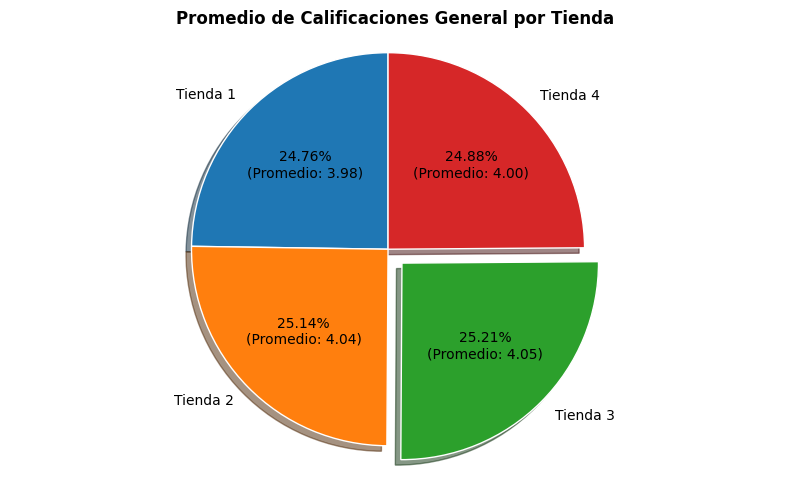

In [43]:
def crear_grafico_promedio_calificaciones_general_torta(datos_tiendas, nombres_tiendas):
    """
    Crea un gráfico de torta para visualizar el promedio de calificaciones general para las cuatro tiendas,
    resaltando la tienda con la mejor calificación.

    Args:
        datos_tiendas (list): Una lista de diccionarios, donde cada diccionario representa los datos de una tienda.
        nombres_tiendas (list): Una lista de nombres para las tiendas.
    """
    # 1. Calcular el promedio de calificaciones para cada tienda
    promedios_tiendas = []
    for tienda_datos in datos_tiendas:
        total_calificaciones = 0
        total_elementos = 0
        for _, (elementos, suma_calificaciones, _) in tienda_datos.items():
            total_calificaciones += suma_calificaciones
            total_elementos += elementos
        promedio_tienda = total_calificaciones / total_elementos if total_elementos > 0 else 0
        promedios_tiendas.append(promedio_tienda)

    # 2. Identificar la tienda con la mejor calificación
    mejor_tienda_index = promedios_tiendas.index(max(promedios_tiendas))
    explode = [0] * len(nombres_tiendas)  # Crea una lista de ceros
    explode[mejor_tienda_index] = 0.1  # Resalta la mejor tienda

    # 3. Crear el gráfico de torta
    fig, ax = plt.subplots(figsize=(8, 5))
    wedges, texts, autotexts = ax.pie(promedios_tiendas,
                                      explode=explode,
                                      labels=nombres_tiendas,
                                      autopct='%1.2f%%',
                                      shadow=True,
                                      startangle=90,
                                      textprops={'fontsize': 10, 'color': 'black'},
                                      wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  # Añade bordes blancos

    ax.set_title('Promedio de Calificaciones General por Tienda', fontsize=12, fontweight='bold')

    # Añadir promedios a las etiquetas de porcentaje
    for i, autotext in enumerate(autotexts):
        autotext.set_text(f"{autotext.get_text()}\n(Promedio: {promedios_tiendas[i]:.2f})") #  Agregamos un salto de línea

    # Hace el gráfico 3D
    ax.axis('equal')  # Para asegurar que la torta sea un círculo
    plt.tight_layout()
    plt.show()

# Llama a la función para crear el gráfico de torta del promedio de calificaciones general
crear_grafico_promedio_calificaciones_general_torta(
    [resultados["Tienda 1"], resultados["Tienda 2"], resultados["Tienda 3"], resultados["Tienda 4"]],
    ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
)

#4. Productos mas vendidos y productos menos vendidos

In [44]:
def analizar_ventas_por_tienda(tienda):
    """
    Analiza las ventas por producto para una tienda, identificando los productos más y menos vendidos.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        tuple: Una tupla que contiene dos diccionarios:
            - Un diccionario con los 3 productos más vendidos y su cantidad de ventas.
            - Un diccionario con los 3 productos menos vendidos y su cantidad de ventas.
    """
    # Agrupa los datos por 'Producto' y cuenta el número de ventas.
    ventas_por_producto = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)

    # Obtiene los nombres de los 3 productos con más ventas y su cantidad.
    productos_mas_vendidos = ventas_por_producto.head(3).to_dict()
    # Obtiene los nombres de los 3 productos con menos ventas y su cantidad.
    productos_menos_vendidos = ventas_por_producto.tail(3).to_dict()

    return productos_mas_vendidos, productos_menos_vendidos


# Analiza las ventas de cada tienda y muestra los resultados de los productos más y menos vendidos
print("Análisis de Ventas por Tienda:")
resultados_por_tienda = {}  # Diccionario para almacenar los resultados de cada tienda
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i+1}"
    productos_mas_vendidos, productos_menos_vendidos = analizar_ventas_por_tienda(tienda)
    resultados_por_tienda[nombre_tienda] = {
        "mas_vendidos": productos_mas_vendidos,
        "menos_vendidos": productos_menos_vendidos
    }
    print(f"\n{nombre_tienda}:")
    print(f"  Productos más vendidos: {', '.join(f'{producto} ({cantidad})' for producto, cantidad in productos_mas_vendidos.items())}")
    print(f"  Productos menos vendidos: {', '.join(f'{producto} ({cantidad})' for producto, cantidad in productos_menos_vendidos.items())}")

# Imprime el diccionario con los resultados de cada tienda
print("\nResultados por Tienda (diccionario):")
print(resultados_por_tienda)

Análisis de Ventas por Tienda:

Tienda 1:
  Productos más vendidos: Armario (60), TV LED UHD 4K (60), Microondas (60)
  Productos menos vendidos: Olla de presión (35), Celular ABXY (33), Auriculares con micrófono (33)

Tienda 2:
  Productos más vendidos: Iniciando en programación (65), Microondas (62), Batería (61)
  Productos menos vendidos: Impresora (34), Mesa de comedor (34), Juego de mesa (32)

Tienda 3:
  Productos más vendidos: Kit de bancas (57), Mesa de comedor (56), Cama king (56)
  Productos menos vendidos: Microondas (36), Set de vasos (36), Bloques de construcción (35)

Tienda 4:
  Productos más vendidos: Cama box (62), Cubertería (59), Cama king (56)
  Productos menos vendidos: Guitarra acústica (37), Armario (34), Guitarra eléctrica (33)

Resultados por Tienda (diccionario):
{'Tienda 1': {'mas_vendidos': {'Armario': 60, 'TV LED UHD 4K': 60, 'Microondas': 60}, 'menos_vendidos': {'Olla de presión': 35, 'Celular ABXY': 33, 'Auriculares con micrófono': 33}}, 'Tienda 2': {'ma

* Ahora genero el grafico de torta para cada una de las tiendas mostrando los tres productos mas vendidos y los tres productos menos vendidos

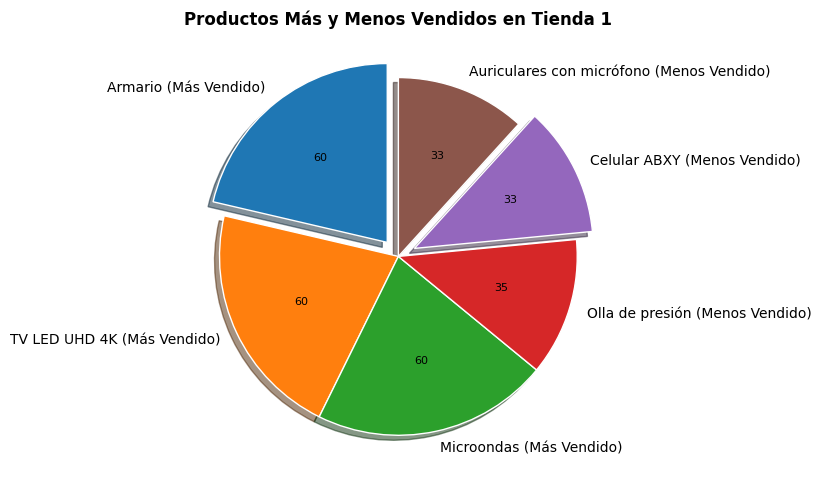

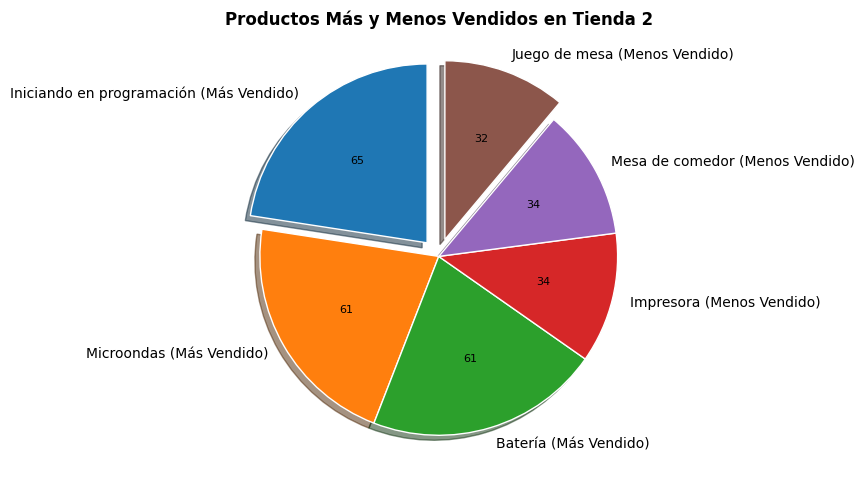

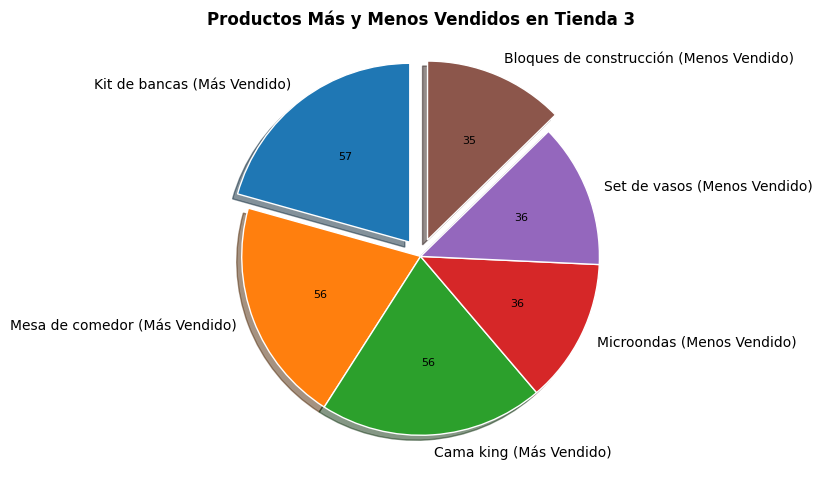

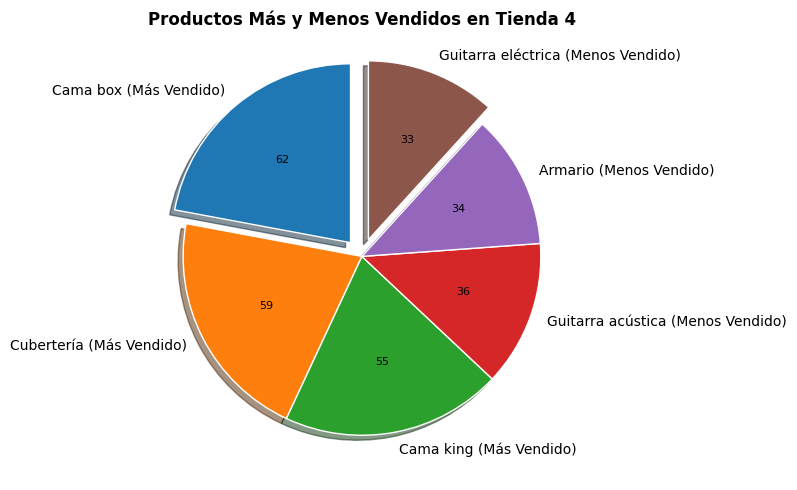

In [45]:
def crear_grafico_torta_por_tienda(nombre_tienda, datos_tienda):
    """
    Crea un gráfico de torta para visualizar los productos más y menos vendidos de una tienda.

    Args:
        nombre_tienda (str): El nombre de la tienda.
        datos_tienda (dict): Un diccionario con los productos más y menos vendidos de la tienda.
    """
    # Prepara los datos para el gráfico
    mas_vendidos = datos_tienda["mas_vendidos"]
    menos_vendidos = datos_tienda["menos_vendidos"]

    # Combina los datos para el gráfico
    productos = list(mas_vendidos.keys()) + list(menos_vendidos.keys())
    cantidades = list(mas_vendidos.values()) + list(menos_vendidos.values())
    etiquetas = [f"{p} (Más Vendido)" for p in mas_vendidos.keys()] + [f"{p} (Menos Vendido)" for p in menos_vendidos.keys()]

    # Encuentra los índices de los productos más y menos vendidos para resaltarlos
    max_index = cantidades.index(max(cantidades))
    min_index = cantidades.index(min(cantidades))
    explode = [0] * len(cantidades)  # Crea una lista de ceros
    explode[max_index] = 0.1  # Resalta el producto más vendido
    explode[min_index] = 0.1  # Resalta el producto menos vendido

    # Crea el gráfico de torta
    fig, ax = plt.subplots(figsize=(8, 5))
    def func(pct, allvals):
        absolute = int(pct/100.*sum(allvals))
        return f"{absolute:d}"

    wedges, texts, autotexts = ax.pie(cantidades,
                                      explode=explode,
                                      labels=etiquetas,
                                      autopct=lambda pct: func(pct, cantidades), # Formatea el texto a cantidad
                                      shadow=True,
                                      startangle=90,
                                      textprops={'fontsize': 10, 'color': 'black'},
                                      wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

    ax.set_title(f'Productos Más y Menos Vendidos en {nombre_tienda}', fontsize=12, fontweight='bold')
    plt.setp(autotexts, fontsize=8, color='black')
    plt.tight_layout()
    plt.show()


# Llama a la función para crear un gráfico de torta para cada tienda
for nombre_tienda, datos_tienda in resultados_por_tienda.items():
    crear_grafico_torta_por_tienda(nombre_tienda, datos_tienda)


#5. Gastos de Envio
* Para los gastos de envio realizamos un codigo parecido al que se ha realizado anteriormente

In [46]:
def calcular_gastos_envio_por_tienda(tiendas):
    """
    Calcula los gastos de envío totales por tienda.

    Args:
        tiendas (dict): Un diccionario donde las claves son los nombres de las tiendas
                        y los valores son los DataFrames de las tiendas.

    Returns:
        dict: Un diccionario donde las claves son los nombres de las tiendas y los
              valores son los gastos de envío totales para cada tienda.
    """
    gastos_envio_por_tienda = {}
    for nombre_tienda, tienda in tiendas.items():
        # Calcula la suma de la columna 'Costo de envío' para cada tienda
        gastos_envio_por_tienda[nombre_tienda] = tienda['Costo de envío'].sum()
    return gastos_envio_por_tienda

# Llama a la función para calcular los gastos de envío por tienda
gastos_envio = calcular_gastos_envio_por_tienda({
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
})

# Imprime los resultados
print("Gastos de envío por tienda:")
for nombre_tienda, gasto_envio in gastos_envio.items():
    print(f"{nombre_tienda}: {gasto_envio:,.0f}")

Gastos de envío por tienda:
Tienda 1: 61,377,900
Tienda 2: 59,485,100
Tienda 3: 58,516,600
Tienda 4: 55,317,400


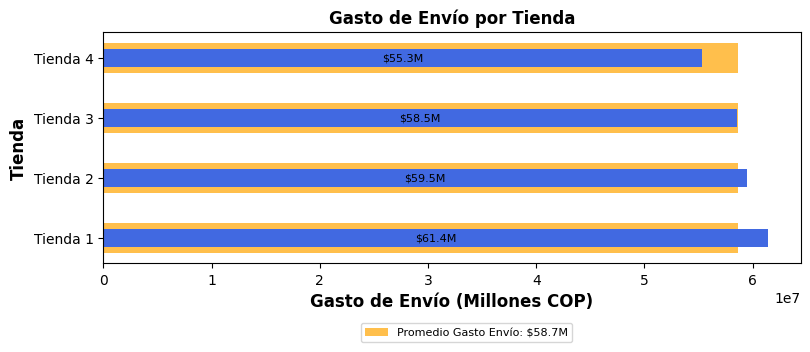

In [59]:
# Calcula el gasto de envío promedio
gasto_envio_promedio = sum(gastos_envio.values()) / len(gastos_envio)
nombre_tiendas = list(gastos_envio.keys())
sumas_gastos_envio = list(gastos_envio.values())

# Función para formatear los valores del eje x a millones
def formatoMillones(x, pos):
    """
    Formatea un número para mostrarlo en millones.
    Args:
        x (float): El número a formatear.
        pos (int): Posición (no se utiliza en este caso, requerido por FuncFormatter).
    Returns:
        str: El número formateado como una cadena (ej., '10M' para 10,000,000).
    """
    return f'{x / 1e6:.0f}M'

# Crea una nueva figura y un conjunto de subgráficos.
plt.figure(figsize=(9, 3))

# Dibuja barras horizontales para el gasto de envío promedio de las tiendas.
plt.barh(nombre_tiendas, [gasto_envio_promedio] * len(nombre_tiendas), height=0.5, color='orange', alpha=0.7, label=f'Promedio Gasto Envío: ${gasto_envio_promedio / 1e6:.1f}M')

# Dibuja barras horizontales para la suma de los gastos de envío por tienda.
barras = plt.barh(nombre_tiendas, sumas_gastos_envio, height=0.3, color='royalblue')

# Establece el título del gráfico.
plt.title('Gasto de Envío por Tienda', fontsize=12, fontweight='bold')
# Establece la etiqueta del eje y.
plt.ylabel('Tienda', fontsize=12, fontweight='bold')
# Establece la etiqueta del eje x.
plt.xlabel('Gasto de Envío (Millones COP)', fontsize=12, fontweight='bold')
# Formatea el eje x para mostrar los valores en millones.

# Agrega etiquetas de texto a las barras.
for bar in barras:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'${width / 1e6:.1f}M', va='center', ha='center', fontsize=8)

# Agrega una leyenda al gráfico.
plt.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.68, -0.3))
# Muestra el gráfico.
plt.show()


* El ingreso neto por tienda es el ingreso por tienda menos el valor total del envio

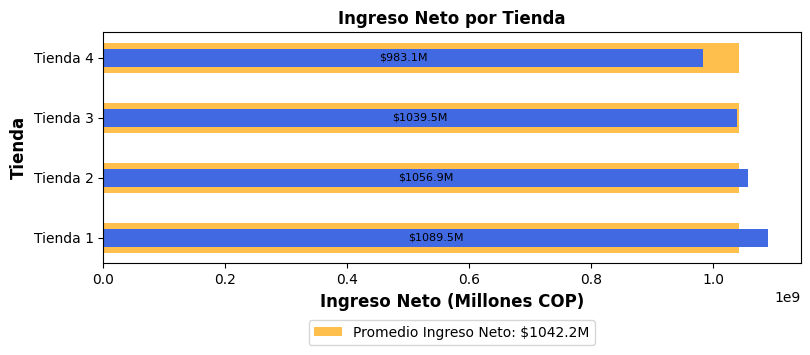

In [60]:
def calcular_ingreso_neto_por_tienda(tiendas):
    """
    Calcula el ingreso neto (ingresos - gastos de envío) para cada tienda.

    Args:
        tiendas (dict): Un diccionario donde las claves son los nombres de las tiendas
                        y los valores son los DataFrames de las tiendas.

    Returns:
        dict: Un diccionario donde las claves son los nombres de las tiendas y los
              valores son los ingresos netos para cada tienda.
    """
    ingreso_neto_por_tienda = {}
    for nombre_tienda, tienda in tiendas.items():
        # Calcula el ingreso neto para cada tienda
        ingreso_neto_por_tienda[nombre_tienda] = tienda['Precio'].sum() - tienda['Costo de envío'].sum()
    return ingreso_neto_por_tienda

# Calcula el ingreso neto para cada tienda
ingreso_neto = calcular_ingreso_neto_por_tienda({
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
})

# Calcula el ingreso neto promedio
ingreso_neto_promedio = sum(ingreso_neto.values()) / len(ingreso_neto)
nombre_tiendas = list(ingreso_neto.keys())
sumas_ingreso_neto = list(ingreso_neto.values())

# Función para formatear los valores del eje x a millones
def formato_millones(x, pos):
    return f'${x / 1e6:.1f}M'

# Crea una nueva figura y un conjunto de subgráficos.
plt.figure(figsize=(9, 3))

# Dibuja barras horizontales para el ingreso neto promedio de las tiendas.
plt.barh(nombre_tiendas, [ingreso_neto_promedio] * len(nombre_tiendas), height=0.5, color='orange', alpha=0.7, label=f'Promedio Ingreso Neto: ${ingreso_neto_promedio / 1e6:.1f}M')

# Dibuja barras horizontales para la suma de los ingresos netos por tienda.
barras = plt.barh(nombre_tiendas, sumas_ingreso_neto, height=0.3, color='royalblue')

# Establece el título del gráfico.
plt.title('Ingreso Neto por Tienda', fontsize=12, fontweight='bold')
# Establece la etiqueta del eje y.
plt.ylabel('Tienda', fontsize=12, fontweight='bold')
# Establece la etiqueta del eje x.
plt.xlabel('Ingreso Neto (Millones COP)', fontsize=12, fontweight='bold')
# Formatea el eje x para mostrar los valores en millones.

# Agrega etiquetas de texto a las barras.
for bar in barras:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'${width / 1e6:.1f}M', va='center', ha='center', fontsize=8)

# Agrega una leyenda al gráfico.
plt.legend(fontsize=10, loc='center right', bbox_to_anchor=(0.715, -0.3))
# Muestra el gráfico.
plt.show()


#6. Localizacion de las Ventas
* Lo primero que hacemos es instalar la libreria "contextily" la cual nos ayuda a importar a un grafico el mapa desde servidores como open street maps

In [49]:
!pip install contextily

Error al cargar el mapa de Colombia. Asegúrate de tener geopandas instalado y acceso a los datos.


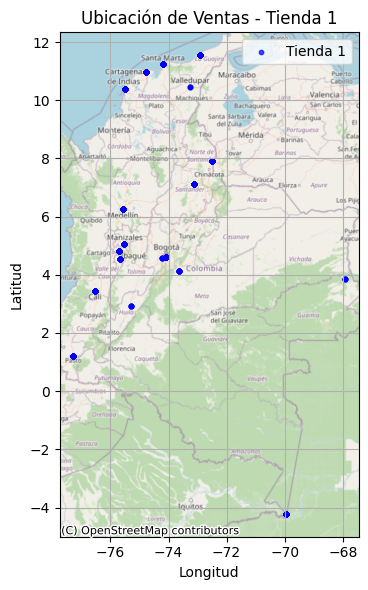

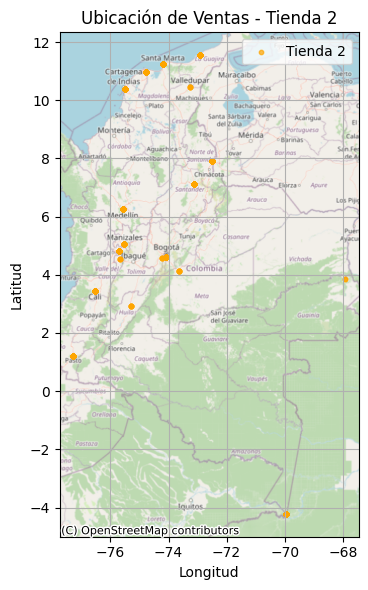

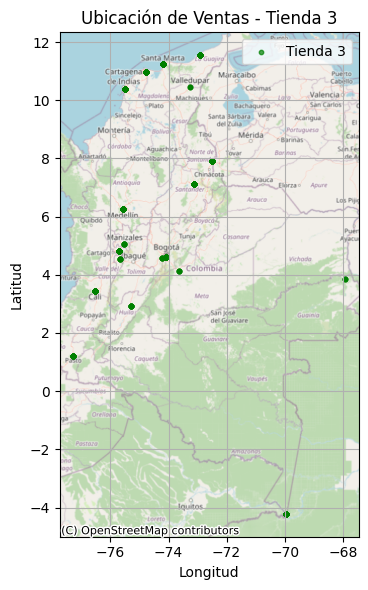

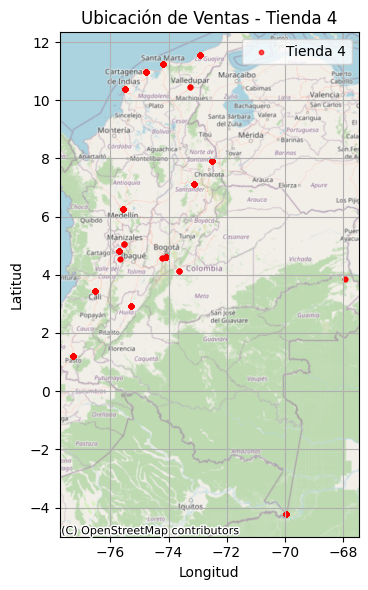

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

# Agregar una columna para identificar la tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar los DataFrames en uno solo
tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Crear un GeoDataFrame a partir del DataFrame de tiendas
geometry = geopandas.points_from_xy(tiendas['lon'], tiendas['lat'])
tiendas_geo = geopandas.GeoDataFrame(tiendas, geometry=geometry, crs="EPSG:4326")  # WGS 84

# Obtener el mapa de Colombia
try:
    colombia = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    colombia = colombia[colombia['name'] == 'Colombia']
    colombia = colombia.to_crs("EPSG:4326")
except:
    print("Error al cargar el mapa de Colombia. Asegúrate de tener geopandas instalado y acceso a los datos.")
    colombia = None

# Crear un gráfico de dispersión para cada tienda
for nombre_tienda, color in [('Tienda 1', 'blue'), ('Tienda 2', 'orange'), ('Tienda 3', 'green'), ('Tienda 4', 'red')]:
    fig, ax = plt.subplots(figsize=(8, 6))  # Tamaño de la figura para cada gráfico

    if colombia is not None:
        # Graficar el mapa de Colombia
        colombia.plot(ax=ax, color='lightgray', alpha=0.7)

    data_tienda = tiendas_geo[tiendas_geo['Tienda'] == nombre_tienda]
    # Graficar las ubicaciones de las tiendas
    data_tienda.plot(ax=ax, color=color, marker='o', label=nombre_tienda, alpha=0.7, markersize=10)

    # Agregar un título específico para cada tienda
    ax.set_title(f'Ubicación de Ventas - {nombre_tienda}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()
    ax.grid(True)

    # Agregar contexto espacial con un mapa base de web
    try:
        import contextily as ctx
        ctx.add_basemap(ax, crs=data_tienda.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
    except ImportError:
        print("contextily no está instalado, el mapa base no se mostrará. Instálalo con: pip install contextily")

    plt.tight_layout()
    plt.show()
